In [1]:
from examples.wmt_2020.common.util.reader import read_annotated_file, read_test_file
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

TRAIN_FILE = "data/en-zh/train.enzh.df.short.tsv"
DEV_FILE = "data/en-zh/dev.enzh.df.short.tsv"
TEST_FILE = "data/en-zh/test20.enzh.df.short.tsv"

train = read_annotated_file(TRAIN_FILE)
dev = read_annotated_file(DEV_FILE)
test = read_test_file(TEST_FILE)

train[:10]

,index,original,translation,z_mean
0,0,The last conquistador then rides on with his s...,最后的征服者骑着他的剑继续前进.,-1.514119
1,1,He shoves Owen into the pit where Digger rips ...,他把欧文扔进了挖掘机挖出儿子心脏的坑里.,-0.600861
2,2,Alpha Phi Alpha also participates in the March...,Alpha Phi Alpha 还参加了 Dimes 'WalkAmerica 的 3 月活...,-0.026856
3,3,"In 1995, Deftones released their debut album A...",1995 年 ， Deftones 发行了首张专辑《肾上腺素》。,1.058370
4,4,Kyrgios also supports the North Melbourne Kang...,基尔吉奥斯还在澳大利亚足球联盟中支持北墨尔本袋鼠足球俱乐部.,0.979822
5,5,The August 16 semifinals placed McFarlane in t...,八月十六日的半决赛使麦克法兰处于第二位.,0.196192
6,6,"However, after a few victories, the campaign f...",但是 ， 在取得了几次胜利之后 ， 这场运动就失败了。,0.872808
7,7,They are untouched by modern craze for aggiorn...,"他们没有被现代对农业的迷恋所触动 "".",0.501266
8,8,"Damiani, Matteo A tragic episode of cannibalis...","达米亚尼, 马特奥在大跃进饥荒中的惨剧.",0.236032
9,9,"On 24 November 2010, Miles Kane revealed that ...",2010 年 11 月 24 日 ， Miles Kane 透露 ， Gallagher 在...,0.456875


In [2]:
train.describe()

,z_mean
count,7000.000000
mean,-0.005423
std,0.919835
min,-4.695833
25%,-0.429569
50%,0.263158
75%,0.664216
max,1.514398


In [3]:
dev.describe()

,z_mean
count,1000.000000
mean,0.164108
std,0.709255
min,-2.739857
25%,-0.318945
50%,0.242820
75%,0.666159
max,2.046389


mean-original 14.10 std-original 4.43 mean-translation 4.84 std-translation 4.00 max-original 29.00 max-translation 48.00


<Figure size 432x288 with 0 Axes>

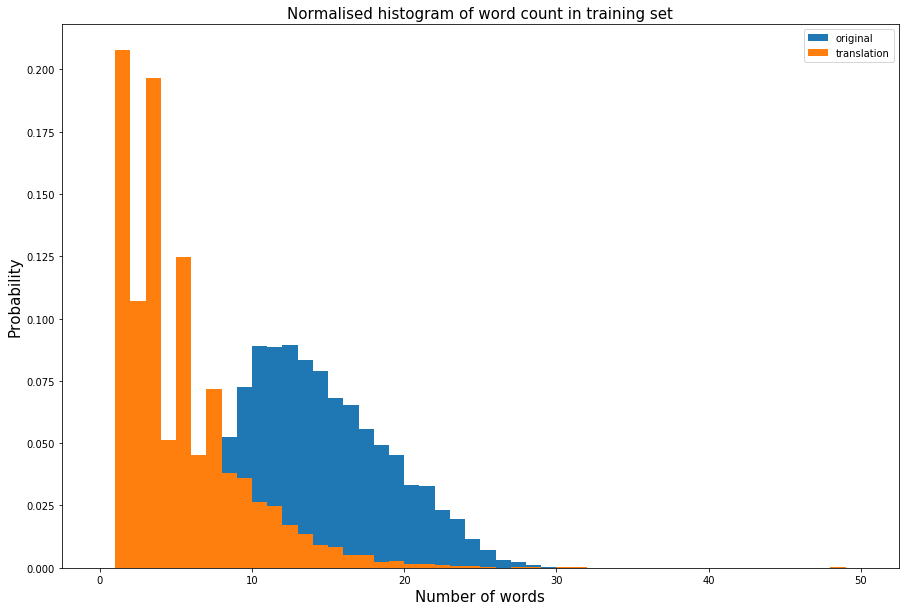

In [4]:
import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(train['original'].tolist()).astype(str)
translation_qs = pd.Series(train['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in training set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))

mean-original 13.95 std-original 4.28 mean-translation 4.88 std-translation 3.93 max-original 30.00 max-translation 30.00


<Figure size 432x288 with 0 Axes>

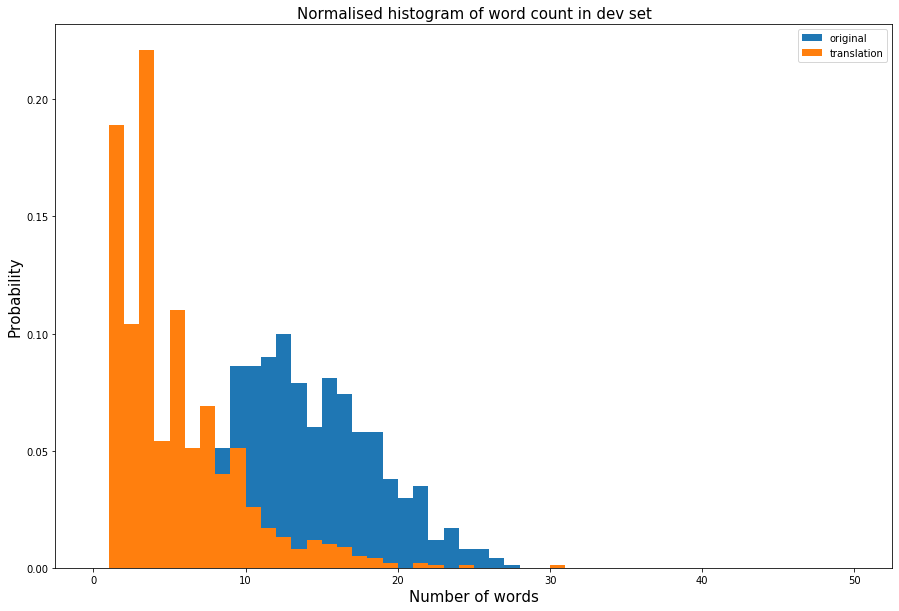

In [5]:

import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(dev['original'].tolist()).astype(str)
translation_qs = pd.Series(dev['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in dev set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))





